# FOI requests data analysis

In this notebook, we merge our scraped information from **foi-ph-scraper** to an existing CSV file of older FOI requests so we can make a viable analysis out of them.

Remember that the **foi-ph-scraper** automatically scrapes new information from the website and updates the CSV it generates so make sure you save an updated first data frame ("df") before you run this.

Essentially, the data to be covered here is from **September 2016 to January 20, 2022**.

In [1]:
import pandas as pd
import re
import requests

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Back track: Read df1

If you ran my autoscraper in my other repository **(foi-ph-scraper)**, you just need to save the CSV file generated from the scraper of that repository into your computer. 

Remember that the scraper automatically fetches new data and updates the CSV **every Sunday.**

In [2]:
df1 = pd.read_csv("foi1.csv")
df1

,agency,date,title,status,purpose,period_covered,link
0,PSA,2022-01-20,Copy of PSA Birth certificate (Mary Anne Robis...,PENDING,Clarification for Misrepresentation of COC,01/20/1950 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,DOST-ASTI,2022-01-20,Daily Rainfall Data surrounding Mt. Banahaw fr...,PENDING,Research and Instruction,01/01/2010 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DSWD,2022-01-20,SAP beneficiaries of San Roque Northern Samar,PENDING,Research on Good Governance,04/01/2020 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DA,2022-01-20,Goat and Carabao Dispersal San Roque Northern ...,PENDING,Research on Good Governance,01/01/2013 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,SSS,2022-01-20,SSS sickness and EC benefits positive COVID-19,PENDING,Follow on SSS sickness application,09/24/2021 - 10/10/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...
6414,DOH,2021-12-07,VAXCERT,SUCCESSFUL,Follow up request,11/15/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6415,DOH,2021-12-07,Vax Certificate,SUCCESSFUL,Request for vax certificate,12/01/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6416,OWWA,2021-12-07,OFW DOLE-AKAP Cash Assistance,SUCCESSFUL,Cash Releasing of DOLE AKAP cash assistance,11/13/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6417,DOH,2021-12-07,Urgent! Vaccination Certification For Travel,SUCCESSFUL,For Travel on December 9,07/26/2021 - 08/23/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


Our main problem with **df1** is **incomplete data**. While over 6,000 requests appear a lot, in reality, the data only covers about 45 days of requests out of the **past 6 years** that the FOI website has been up.

This is because the PCOO, as we are told, takes down some old FOI requests from its website, most of the time at the request of the poster.

They do keep **a record** of all requests and they are contained in a separate CSV found below.

## Sidebar: change the 'date' column to date format

We forgot to do this after we scraped and we need to do this here for the merging.

In [3]:
df1.date = pd.to_datetime(df1.date)

## Second (and larger) data frame

We asked the PCOO, which manages the FOI website, for earlier data which are all available through "https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR1rYDiXlMcllT7Ko4bEJUYGTAIWIloljXhk4EmUhJo0ehHksZ3vYIFDkw0#gid=875187444".

It lists down all requests from **September 2016-December 2021.** We need to clean the data though (i.e. convert dates, remove duplicates) so that we can **merge** it with our scraped data and process and analyze later.

In [4]:
df2 = pd.read_csv('eFOI Raw Data as of 31 December 2021.xlsx - Raw Data as of 31 December 2021.csv')
df2

,DATE CREATED,AGENCY,TITLE OF REQUESTED DOCUMENTS,PERIOD/COVERAGE,PURPOSE,STATUS,EXTENDED?,REASON FOR DENIAL
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,NO,—
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,NO,—
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,NO,—
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,YES,—
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,YES,—
...,...,...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL,NO,—
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING,NO,—
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED,NO,—
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL,NO,—


## Cleaning df2

### Rename the columns

Offhand, you will notice already that two columns are unique here vs. the first df: **extended?** and **reason_denial** which explains reasons for denial. 

We decided to just **drop** the two for now here. We may get back to **reason_denial** during our analysis.

Take note that the **first df** likewise have a unique column for **link**. We will keep that just to ensure we can go back to them for analysis later. That means when this both are merged, there will be **NaNs** under **link**.

In [5]:
df2.columns = ['date', 'agency', 'title', 'period_covered', 'purpose', 'status', 'extended', 'reason_denial']
df2 = df2.drop(['extended'], axis= 1)
df2

,date,agency,title,period_covered,purpose,status,reason_denial
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,—
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,—
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,—
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,—
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,—
...,...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL,—
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING,—
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED,—
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL,—


### Convert date to date time

We use regex here.

In [6]:
df2['date'] = df2.date.str.replace("HKT", "")
df2['date'] = df2.date.str.replace(r'[()](\d\d[:]\d\d[:]\d\d[.]\d\d\d)[()]', '', regex=True)
df2.date = pd.to_datetime(df2.date)
df2.head()

,date,agency,title,period_covered,purpose,status,reason_denial
0,2016-11-25,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,—
1,2016-11-25,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,—
2,2016-11-25,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,—
3,2016-11-25,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,—
4,2016-11-25,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,—


## Merging the two dfs

Combine the two dfs into one.

We **remove duplicates** based on two qualifications: date and title of requests. The two need to match in the entries to be dropped. 

In [7]:
df_final = pd.concat([df1,df2]).drop_duplicates(subset=['date', 'title']).reset_index(drop=True)
df_final = df_final.sort_values('date').reset_index(drop=True)
df_final

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
1,NAP,2016-11-25,"Northrop F-5's, F-8 Vought Crusaders and other...",DENIED,Information and general knowledge,01/01/1964 - 11/25/2016,NaN,—
2,DICT,2016-11-25,"Request for Architecture of SSS, Pagibig, Phil...",ACCEPTED,To validate if our data is properly secured.,01/01/2016 - 11/25/2016,NaN,—
3,PCGG,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,DENIED,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN,—
4,PSA,2016-11-25,"The amount of yellowfin, skipjack, bigeye tuna...",DENIED,Research and Development,01/01/2010 - 12/31/2015,NaN,—
...,...,...,...,...,...,...,...,...
86235,DOH,2022-01-20,Floor plan of Tondo Medical Center,PENDING,Academic Case Study,01/20/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86236,BOI,2022-01-20,Herbal/Medicinal Plant Industry,PENDING,Thesis Research,01/01/2017 - 11/27/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86237,DTI,2022-01-20,Companies in the Herbal or Medicinal Plant Ind...,PENDING,Thesis Research,01/01/2017 - 11/27/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86238,ECC,2022-01-20,COvid positive sickness Benifits,PENDING,Question or Inquiry,12/31/2021 - 01/16/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Looking into the NaNs

We already dropped the duplicates, now we look for null values.

In [8]:
df_final.isna().value_counts()

agency  date   title  status  purpose  period_covered  link   reason_denial
False   False  False  False   False    False           True   False            81479
                                                       False  True              4758
               True   False   False    False           True   False                2
               False  False   True     False           True   False                1
dtype: int64

In [9]:
df_final.link.isna().value_counts()

True     81482
False     4758
Name: link, dtype: int64

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [10]:
df_final.status.value_counts(normalize=True) * 100

SUCCESSFUL                43.468228
DENIED                    26.938776
PENDING                    9.169759
PARTIALLY SUCCESSFUL       7.809601
ACCEPTED                   4.108302
CLOSED                     3.877551
AWAITING CLARIFICATION     2.350417
REFERRED                   1.262755
PROCESSING                 0.998377
EXTENDED                   0.016234
Name: status, dtype: float64

<AxesSubplot:>

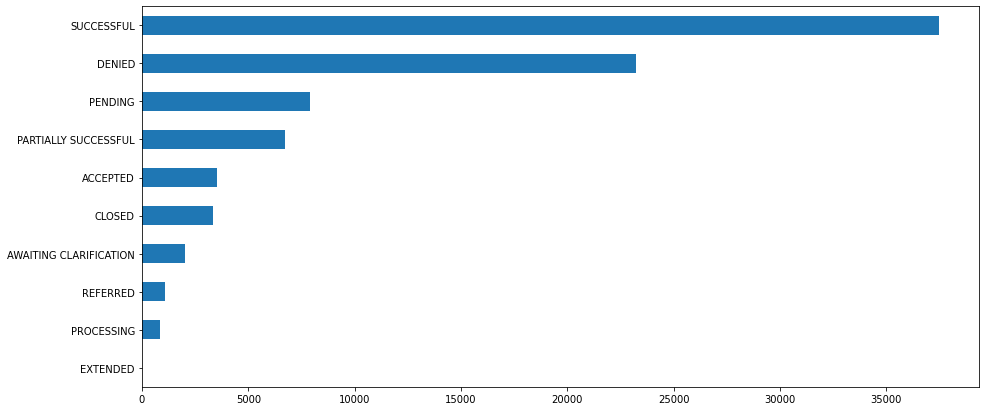

In [11]:
df_final.status.value_counts().sort_values().plot(kind='barh', figsize=(15,7))

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [12]:
df_final.agency.value_counts().head(10)

DOH      5820
PSA      5308
DOLE     4729
SSS      3671
DepEd    3569
OWWA     3564
DSWD     3354
BIR      3323
NTC      2686
DPWH     2313
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [13]:
df_final[df_final.status=="DENIED"].agency.value_counts().head(10)

BIR     2159
DSWD    2067
DENR    1172
DOH      997
DTI      966
DOLE     775
DOTr     717
HDMF     620
DILG     543
PSA      459
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [31]:
df_final[df_final.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate                      47
Vaxcert                                      34
VaxCert                                      28
Vaccination certificate                      28
Vaccine Certificate                          27
Swab test result                             19
Vax Cert                                     19
VAXCERT                                      16
Annual Hospital Statistical Report           16
Vax Certificate                              15
Annual Health Facility Statistical Report    14
VaxCertPH                                    13
Vaccine certificate                          12
Swab Test Result                             11
vaccination certificate                      11
VACCINATION CERTIFICATE                      10
Vaccination Card                              9
Vax Cert Request                              9
Vax cert                                      8
Mental Health Cases                           8
Name: title, dtype: int64

In [33]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df_final[df_final['title'].isin(vax)]
df_vax

,agency,date,title,status,purpose,period_covered,link,reason_denial
77715,DOH,2021-11-15,Vax Cert,SUCCESSFUL,Travel,11/23/0201 - 11/26/0201,NaN,—
77865,DOH,2021-11-15,Vaccination Certificate,SUCCESSFUL,Travel purpose,11/15/2021 - 11/15/2021,NaN,—
77929,DOH,2021-11-16,VaxCertPH,SUCCESSFUL,Follow-Up on VaxCertPH,11/01/2021 - 11/16/2021,NaN,—
77988,DOH,2021-11-16,VAX CERT,SUCCESSFUL,Requirement for work and travel,11/16/2021 - 11/16/2021,NaN,—
78101,DOH,2021-11-16,VaxCert,SUCCESSFUL,for travel purpose,11/16/2021 - 11/16/2021,NaN,—
...,...,...,...,...,...,...,...,...
86062,DOH,2022-01-18,VaxCert,SUCCESSFUL,Update,01/18/2022 - 01/18/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86097,DOH,2022-01-19,Vaccination Card,PENDING,Travel Abroad,09/23/2021 - 10/28/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86129,DOH,2022-01-19,Vaxcert,PENDING,Correction of Middle Name.,01/19/2022 - 01/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86133,DOH,2022-01-19,Vaccine certificate,PENDING,Travel,09/03/0021 - 10/01/0021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


Interpretation: Nearly 30% of DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [35]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df_final[df_final['title'].isin(sap)]
df_sap[df_sap.status=="DENIED"]

,agency,date,title,status,purpose,period_covered,link,reason_denial
26299,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
26881,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
26894,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
27010,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
27158,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
...,...,...,...,...,...,...,...,...
65809,DSWD,2021-08-29,Sap,DENIED,Update may 2nd tranche,08/20/2020 - 08/29/2021,NaN,invalid-request
65949,DSWD,2021-08-31,SAP,DENIED,For Personal use,05/09/2020 - 08/15/2021,NaN,invalid-request
78619,DSWD,2021-11-19,sap 2nd tranche,DENIED,concern about the 2nd tranche,11/19/2021 - 11/19/2021,NaN,—
78719,DSWD,2021-11-20,SAP 2ND TRANCHE,DENIED,Small store/house rental,04/30/2020 - 11/15/2021,NaN,invalid-request


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [37]:
df_final[df_final.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    323
True     240
Name: title, dtype: int64

Interpretation: Nearly three in four OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [15]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df_final[df_final['title'].isin(tax)]
df_tax

,agency,date,title,status,purpose,period_covered,link,reason_denial
10184,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
10373,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
12663,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
16695,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
17620,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
...,...,...,...,...,...,...,...,...
85963,BIR,2022-01-18,TIN Verification,DENIED,References for transacting with government age...,01/18/2000 - 01/18/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86072,BIR,2022-01-19,Income Tax Return,PENDING,Copy of my ITR for the year 2020,01/01/2020 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86115,BIR,2022-01-19,BIR 2316,PENDING,Loan Application,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
86124,BIR,2022-01-19,ITR,PENDING,Employment,01/01/2020 - 12/23/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


In [16]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    54.800591
AWAITING CLARIFICATION    30.132939
SUCCESSFUL                 7.237814
ACCEPTED                   2.363368
PARTIALLY SUCCESSFUL       2.067947
PENDING                    1.329394
CLOSED                     1.181684
PROCESSING                 0.443131
REFERRED                   0.443131
Name: status, dtype: float64

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [17]:
df_final[df_final.agency=="BIR"].groupby('status').title.count()
#There were a lot of requests for TIN or tax identification number.

status
ACCEPTED                    59
AWAITING CLARIFICATION     557
CLOSED                      36
DENIED                    2159
PARTIALLY SUCCESSFUL        52
PENDING                     21
PROCESSING                   7
REFERRED                     5
SUCCESSFUL                 427
Name: title, dtype: int64

## Top reasons for denial

Applicable only to data as of December 2021.

In [26]:
df_final.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               69524
wrong-agency                     6146
NaN                              4758
incomplete-request               2549
invalid-request                  1736
information-available-online     1527
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [18]:
df_final.title.str.contains("SALN", regex=False, case=False).value_counts()

False    86049
True       189
Name: title, dtype: int64

Nearly 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [19]:
df_final.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE)

,,0
,match,
35,0,SALN of Bongbong Marcos
141,0,"SALN of the following: Ronnan Y. Pado, Ernani ..."
260,0,SALN of Niño Maximino A. Lazaro Municipal Coun...
277,0,The SALNs of each of the cabinet members of th...
331,0,The SALNs of Presidents Aquino and Duterte's C...
...,...,...
82506,0,Data on Malnutrition per Region by Age
82922,0,"Malnourished Children in Naga City, Camarines Sur"
83871,0,SALN Request & Accomplishments & Report of Off...


In [46]:
df_final[df_final.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#35 requests for the SALN of the Vice President.

35

## Track request numbers through time

### By month

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

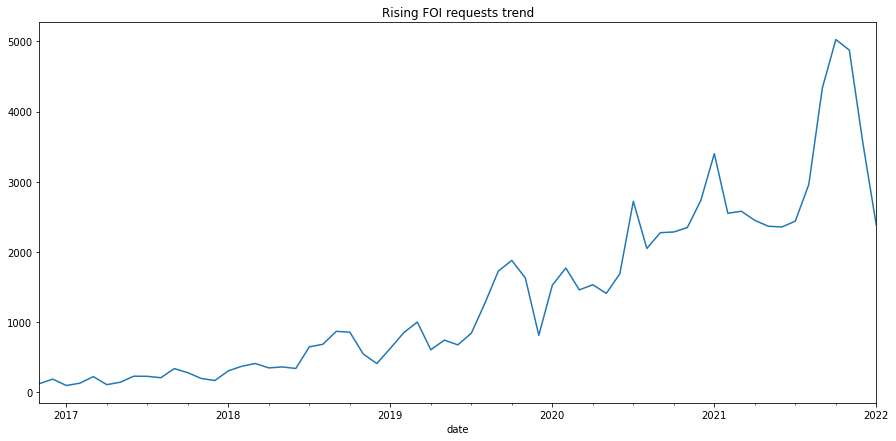

In [20]:
df_final.resample('M', on='date').title.count().plot(title="Rising FOI requests trend", figsize=(15,7))

In [21]:
df_final.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2021-10-31    5027
2021-11-30    4877
2021-09-30    4335
2021-12-31    3556
2021-01-31    3398
2021-08-31    2960
2020-12-31    2732
2020-07-31    2719
2021-03-31    2577
2021-02-28    2548
Name: title, dtype: int64

### By year

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

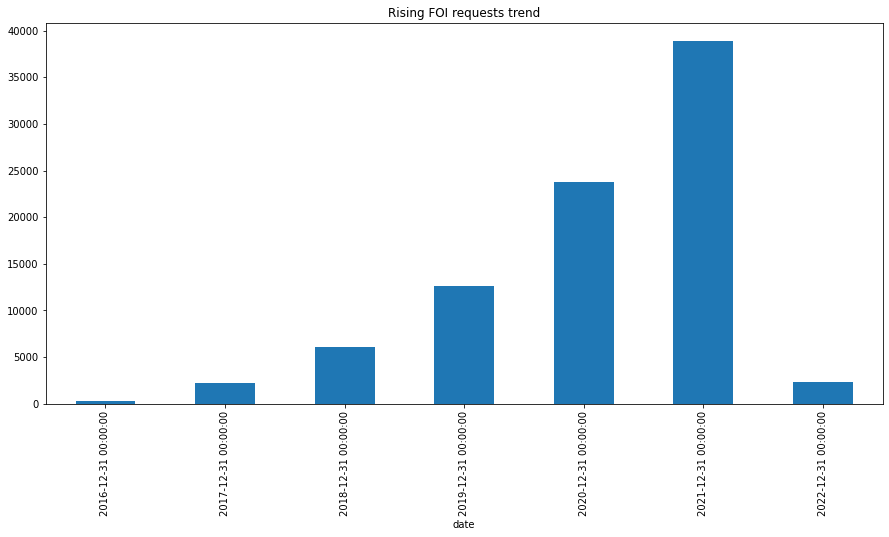

In [22]:
df_final.resample('A', on='date').title.count().plot(kind="bar", title="Rising FOI requests trend", figsize=(15,7))

## Year-on-year change shows slowing down increase in FOI requests

In [23]:
df_final.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    663.973064
2018-12-31    167.650948
2019-12-31    107.409847
2020-12-31     88.567799
2021-12-31     63.674638
2022-12-31    -93.890832
Freq: A-DEC, Name: title, dtype: float64

## Save combined df to CSV

In [24]:
#df_final.to_csv("foi(2016-Dec7).csv", index=False)
#pd.read_csv("foi(2016-Dec7).csv")